<a href="https://colab.research.google.com/github/jaiyeoba-1/Projects/blob/main/Correlation_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Ensure numeric data is ready for analysis
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Calculate Correlation

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Display the correlation matrix
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# Filter correlations above 0.5 or below -0.5
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(significant_correlations)

                SeniorCitizen   tenure  MonthlyCharges  TotalCharges
SeniorCitizen             1.0      NaN             NaN           NaN
tenure                    NaN  1.00000             NaN      0.825880
MonthlyCharges            NaN      NaN        1.000000      0.651065
TotalCharges              NaN  0.82588        0.651065      1.000000


## Correlation Visualizations

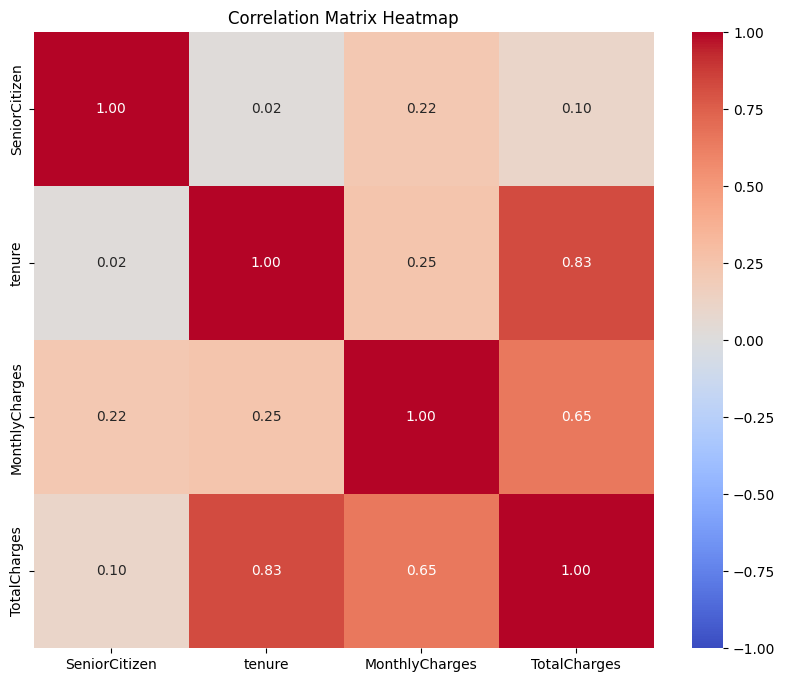

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

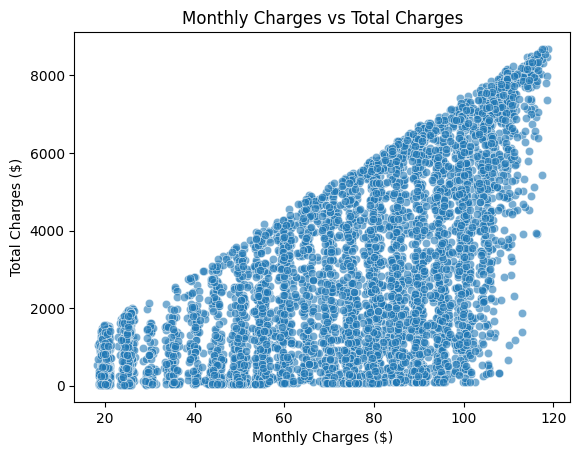

In [ ]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, alpha=0.6)
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Total Charges ($)")
plt.show()


### Is there a correlation between `MonthlyCharges` and `TotalCharges`?

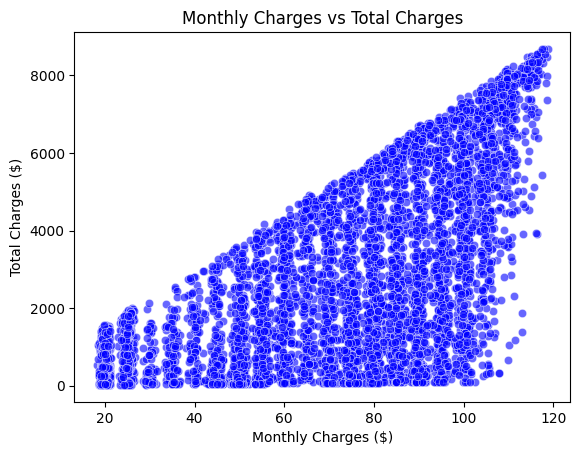

In [ ]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, alpha=0.6, color='blue')
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Total Charges ($)")
plt.show()

In [ ]:
correlation = df['MonthlyCharges'].corr(df['TotalCharges'])
print(f"Correlation between Monthly Charges and Total Charges: {correlation:.2f}")

Correlation between Monthly Charges and Total Charges: 0.65


### Does longer tenure reduce churn likelihood?

In [ ]:
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})
correlation_tenure_churn = df['tenure'].corr(df['Churn_Encoded'])
print(f"Correlation between Tenure and Churn: {correlation_tenure_churn:.2f}")

Correlation between Tenure and Churn: -0.35


<ipython-input-20-5019032cb7b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')


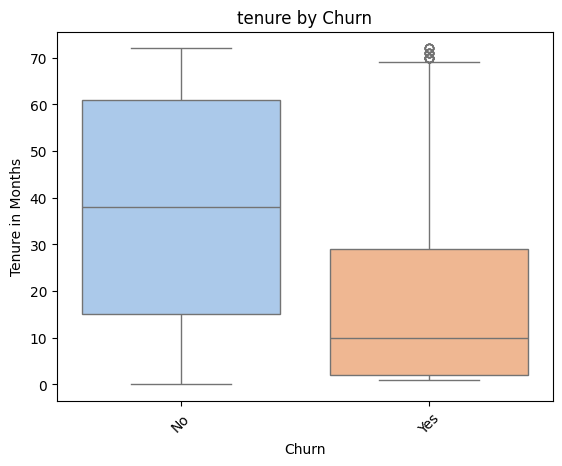

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')
plt.title("tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure in Months")
plt.xticks(rotation=45)
plt.show()

### Are payment methods linked to differences in `MonthlyCharges`?

<ipython-input-17-318df2567b89>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='pastel')


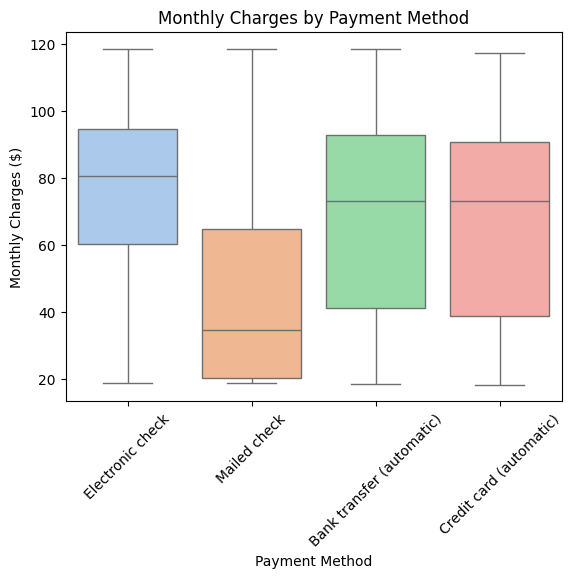

In [ ]:
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='pastel')
plt.title("Monthly Charges by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Monthly Charges ($)")
plt.xticks(rotation=45)
plt.show()